In [20]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = pd.read_csv('Google_Stock_Price_Train.csv')

In [21]:
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [22]:
data.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [24]:
data.describe()

,Open,High,Low
count,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409
std,151.904442,153.008811,150.552807
min,279.120000,281.210000,277.220000
25%,404.115000,406.765000,401.765000
50%,537.470000,540.750000,532.990000
75%,654.922500,662.587500,644.800000
max,816.680000,816.680000,805.140000


In [25]:
import warnings
warnings.filterwarnings('ignore')

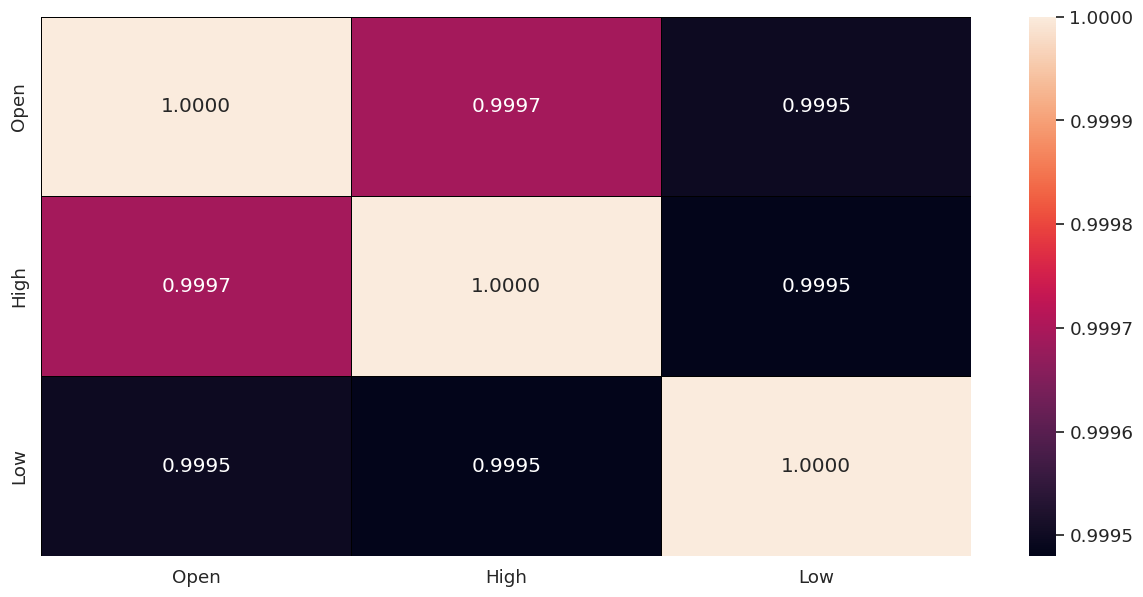

In [26]:
f, ax = plt.subplots(figsize = (15,7))
sns.heatmap(data.corr(), annot = True, linewidths=0.5, linecolor = "black",
fmt = ".4f", ax = ax)
plt.show()

In [27]:
# Set a custom color palette for the heatmap:
cmap = sns.diverging_palette(220, 10, as_cmap=True)


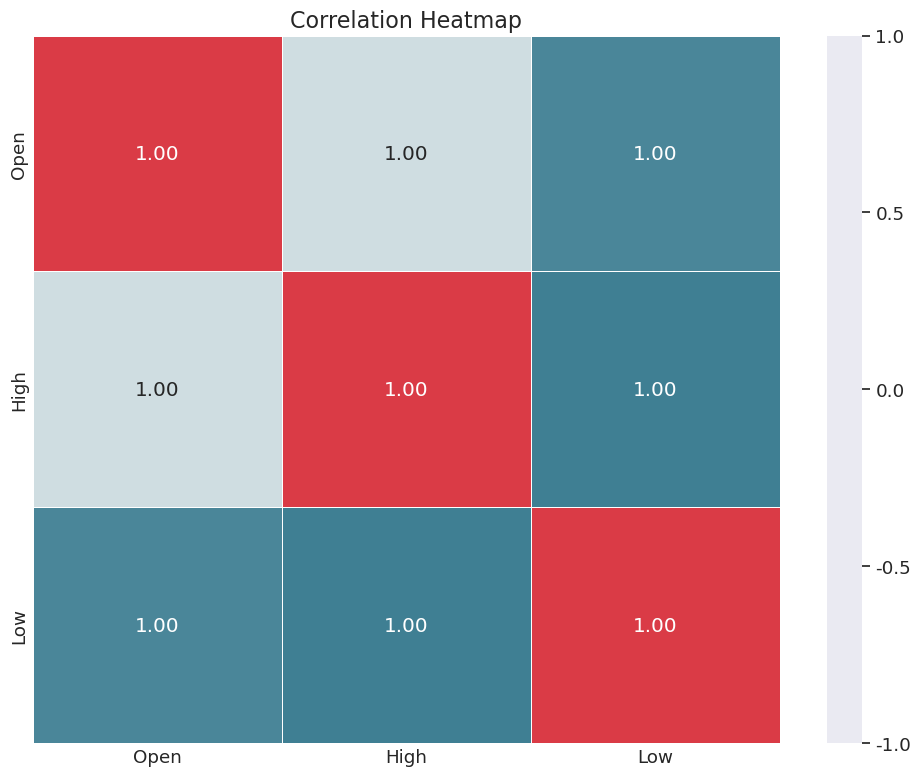

In [28]:
# Set up the figure and axis with a larger size and font scale:

fig, ax = plt.subplots(figsize=(10, 8))
sns.set(font_scale=1.2)


# Plot the heatmap with improved aesthetics and scientific formatting:
sns.heatmap(data.corr(), annot=True, fmt=".2f", linewidths=0.5, cmap=cmap, cbar=True, ax=ax)
ax.set_title('Correlation Heatmap', fontsize=16)
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(axis='both', which='both', length=0)
cbar = ax.collections[0].colorbar
cbar.set_ticks([-1, -0.5, 0, 0.5, 1])
cbar.set_ticklabels(['-1.0', '-0.5', '0.0', '0.5', '1.0'])
plt.tight_layout()
plt.show()



In [29]:
data_set = data.loc[:, ["Open"]].values
data_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [30]:
train = data_set[:len(data_set) - 50]
test = data_set[len(train):]
train.reshape(train.shape[0],1)
train.shape

(1208, 1)

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
train_scaler = scaler.fit_transform(train)
train_scaler

array([[0.08886192],
       [0.10045847],
       [0.09768454],
       ...,
       [0.96447835],
       [0.97998536],
       [1.        ]])

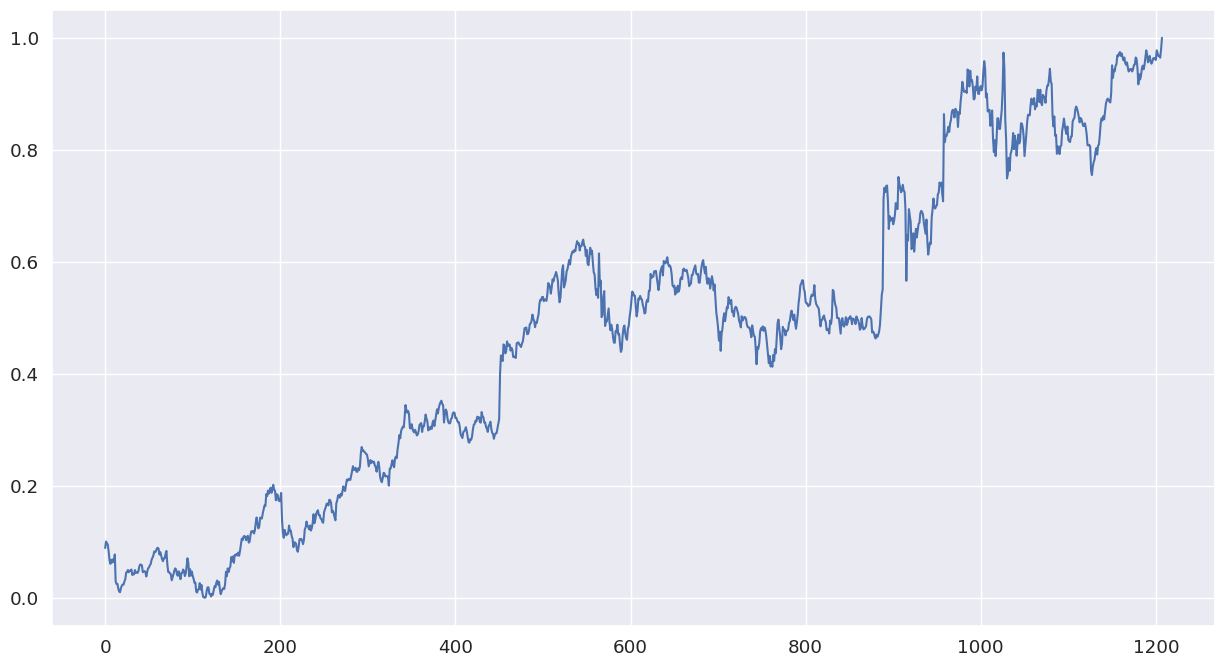

In [32]:
plt.figure(figsize=[15,8],)
plt.plot(train_scaler)
plt.show()

In [36]:
X_train = []
Y_train = []
timesteps = 50
for i in range(timesteps, len(train_scaler)):
    X_train.append(train_scaler[i - timesteps:i, 0])
    Y_train.append(train_scaler[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [37]:
X_train.shape

(1158, 50, 1)

In [38]:
X_train

array([[[0.08886192],
        [0.10045847],
        [0.09768454],
        ...,
        [0.03806442],
        [0.04646325],
        [0.05245415]],

       [[0.10045847],
        [0.09768454],
        [0.0948143 ],
        ...,
        [0.04646325],
        [0.05245415],
        [0.05399522]],

       [[0.09768454],
        [0.0948143 ],
        [0.08267838],
        ...,
        [0.05245415],
        [0.05399522],
        [0.05811758]],

       ...,

       [[0.9528818 ],
        [0.96871629],
        [0.96698259],
        ...,
        [0.97210664],
        [0.96721375],
        [0.96804207]],

       [[0.96871629],
        [0.96698259],
        [0.97208738],
        ...,
        [0.96721375],
        [0.96804207],
        [0.96447835]],

       [[0.96698259],
        [0.97208738],
        [0.9744953 ],
        ...,
        [0.96804207],
        [0.96447835],
        [0.97998536]]])

In [39]:
Y_train.shape

(1158,)

In [40]:
Y_train

array([0.05399522, 0.05811758, 0.06025582, ..., 0.96447835, 0.97998536,
       1.        ])

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout

# Initializing the RNN
regressor = Sequential()

# Add the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units=50, activation="tanh", return_sequences=True, input_shape=(timesteps, 1)))  # Replace 'input_shaperegressor' with 'input_shape'

regressor.add(Dropout(0.2))

# Second RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units=50, activation="tanh", return_sequences=True))
regressor.add(Dropout(0.2))

# Third RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units=50, activation="tanh", return_sequences=True))
regressor.add(Dropout(0.2))

# Fourth RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units=50, activation="tanh"))  # Remove the extra regressor.add(Dropout(0.2)) statement
regressor.add(Dropout(0.2))

# Add the output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer="adam", loss="mean_squared_error")

# Fitting the RNN to the training set
regressor.fit(X_train, Y_train, epochs=100, batch_size=32)


Epoch 1/100
37/37 [==============================] - 11s 79ms/step - loss: 0.4157
Epoch 2/100
37/37 [==============================] - 3s 82ms/step - loss: 0.2416
Epoch 3/100
37/37 [==============================] - 3s 82ms/step - loss: 0.1774
Epoch 4/100
37/37 [==============================] - 3s 72ms/step - loss: 0.1473
Epoch 5/100
37/37 [==============================] - 3s 71ms/step - loss: 0.1096
Epoch 6/100
37/37 [==============================] - 3s 81ms/step - loss: 0.0995
Epoch 7/100
37/37 [==============================] - 3s 74ms/step - loss: 0.0757
Epoch 8/100
37/37 [==============================] - 3s 79ms/step - loss: 0.0697
Epoch 9/100
37/37 [==============================] - 4s 97ms/step - loss: 0.0557
Epoch 10/100
37/37 [==============================] - 3s 92ms/step - loss: 0.0489
Epoch 11/100
37/37 [==============================] - 3s 82ms/step - loss: 0.0425
Epoch 12/100
37/37 [==============================] - 3s 84ms/step - loss: 0.0416
Epoch 13/100
37/37 [====

In [50]:
inputs = data_set[len(data_set) - len(test) - timesteps:]
inputs = scaler.transform(inputs)

In [52]:
X_test = []
for i in range(timesteps, inputs.shape[0]):
    X_test.append(inputs[i - timesteps:i, 0])
X_test_rnn = np.array(X_test)
X_test_rnn = np.reshape(X_test_rnn, (X_test_rnn.shape[0], X_test_rnn.shape[1], 1))
predicted_stock_price = regressor.predict(X_test_rnn)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

2/2 [==============================] - 1s 32ms/step


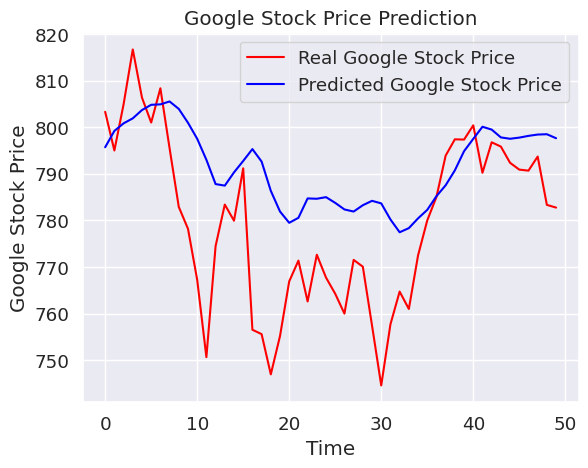

In [53]:
# visualising the results
plt.plot(test, color = "red", label = "Real Google Stock Price")
plt.plot(predicted_stock_price, color = "blue", label = "Predicted Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()

In [54]:
trainX = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

In [55]:
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [57]:
model = Sequential()
model.add(LSTM(10, input_shape = (1, timesteps)))
model.add(Dense(1))
model.compile(loss = "mean_squared_error", optimizer = "adam")
model.fit(trainX, Y_train, epochs = 50, batch_size = 1)

Epoch 1/50


2023-06-08 17:04:55.793087: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-08 17:04:55.796881: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-08 17:04:55.800105: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1158/1158 [==============================] - 10s 5ms/step - loss: 0.0027
Epoch 2/50
1158/1158 [==============================] - 5s 5ms/step - loss: 0.0015
Epoch 3/50
1158/1158 [==============================] - 5s 4ms/step - loss: 0.0013
Epoch 4/50
1158/1158 [==============================] - 5s 5ms/step - loss: 0.0011
Epoch 5/50
1158/1158 [==============================] - 5s 5ms/step - loss: 0.0010
Epoch 6/50
1158/1158 [==============================] - 5s 5ms/step - loss: 0.0011
Epoch 7/50
1158/1158 [==============================] - 5s 4ms/step - loss: 9.8057e-04
Epoch 8/50
1158/1158 [==============================] - 5s 5ms/step - loss: 0.0010
Epoch 9/50
1158/1158 [==============================] - 5s 5ms/step - loss: 8.4757e-04
Epoch 10/50
1158/1158 [==============================] - 5s 5ms/step - loss: 7.9024e-04
Epoch 11/50
1158/1158 [==============================] - 5s 4ms/step - loss: 8.3256e-04
Epoch 12/50
1158/1158 [==============================] - 5s 4ms/step - loss: 8.

In [58]:
testX = np.array(X_test)
testX = testX.reshape(testX.shape[0], 1, testX.shape[1])
predict_lstm = model.predict(testX)
predict_lstm = scaler.inverse_transform(predict_lstm)

2023-06-08 17:10:22.174633: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-08 17:10:22.178561: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-08 17:10:22.181720: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2/2 [==============================] - 1s 7ms/step


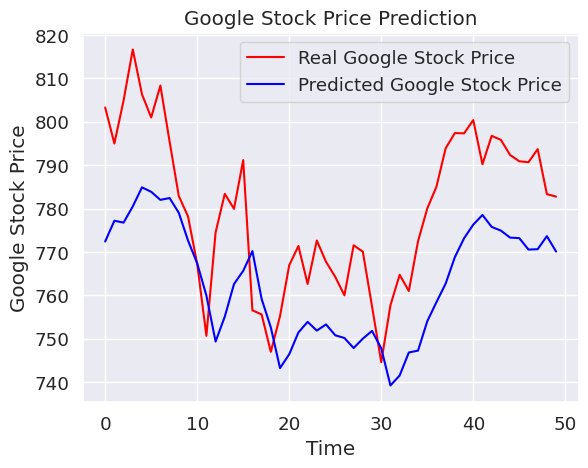

In [59]:
plt.plot(test, color = "red", label = "Real Google Stock Price")
plt.plot(predict_lstm, color = "blue", label = "Predicted Google Stock Price")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()

In [61]:
# load sample dataset
from pycaret.datasets import get_data
# data = get_data('diabetes')

In [63]:
from pycaret.classification import *
s = setup(data, target = 'Class variable', session_id = 123)

AttributeError: partially initialized module 'patsy' has no attribute 'constraint' (most likely due to a circular import)